In [1]:
import pandas as pd 
from varname import nameof
mae_with_onehot = pd.read_csv('./mae_with_onehot.csv')
mae_without_onehot = pd.read_csv('./mae_without_onehot.csv')
mse_with_onehot = pd.read_csv('./mse_with_onehot.csv')
mse_without_onehot = pd.read_csv('./mse_without_onehot.csv')

In [2]:
resultList = [mae_with_onehot, mae_without_onehot, mse_with_onehot, mse_without_onehot]
for result in resultList:
    result.sort_values(by=['test_score'], inplace=True)

In [3]:
import matplotlib.pyplot as plt 

def draw(tmp,title):
    # get all test_score < 10 data 
    result = tmp[tmp['test_score'] < 10]
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.title(title)
    plt.plot(result['name'], result['test_score'], 'o-')

def clear(result):
    tmp = result[result['test_score'] < 10]
    tmp = tmp[tmp['test_score'] < 10]
    return tmp

def clearname(result):
    # if name has regressor tail, remove it
    tmp = result.copy()
    tmp['name'] = tmp['name'].str.replace('Regressor', '')
    tmp['name'] = tmp['name'].str.replace('Regression', '')
    return tmp

In [4]:
print(nameof(mae_with_onehot))
print(mae_with_onehot[mae_with_onehot['test_score'] > 10])
print(nameof(mae_without_onehot))
print(mae_without_onehot[mae_without_onehot['test_score'] > 10])
print(nameof(mse_with_onehot))
print(mse_with_onehot[mse_with_onehot['test_score'] > 10])
print(nameof(mse_without_onehot))
print(mse_without_onehot[mse_without_onehot['test_score'] > 10])

mae_with_onehot
                name    test_score   train_score
18   RANSACRegressor  1.914991e+11  2.076992e+10
15  LinearRegression  2.010680e+11  3.853654e-01
mae_without_onehot
            name    test_score   train_score
16  SGDRegressor  3.377136e+14  3.373692e+14
mse_with_onehot
                name    test_score   train_score
15  LinearRegression  9.477466e+22  5.720158e-01
18   RANSACRegressor  1.373472e+23  5.160883e+21
mse_without_onehot
            name    test_score   train_score
16  SGDRegressor  1.012115e+29  1.001488e+29


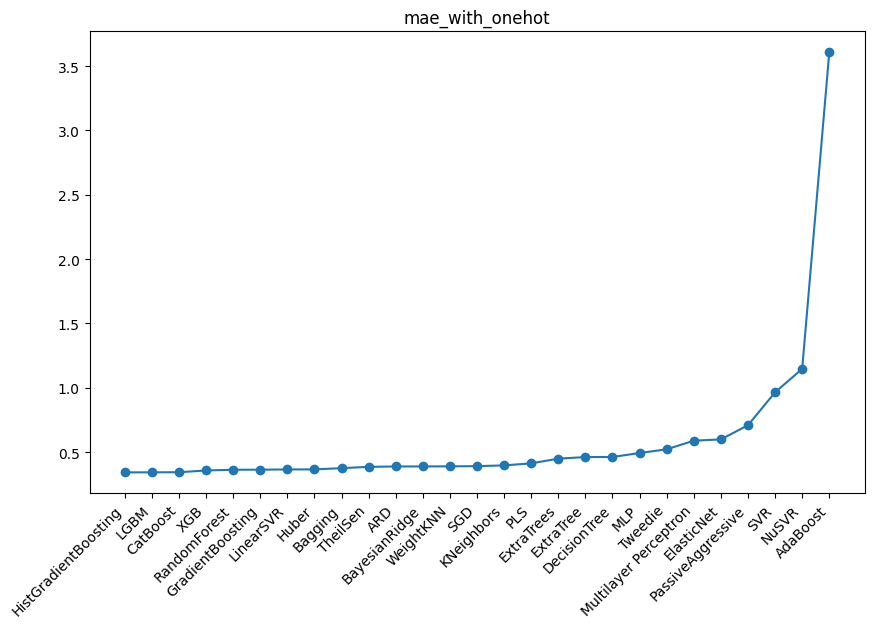

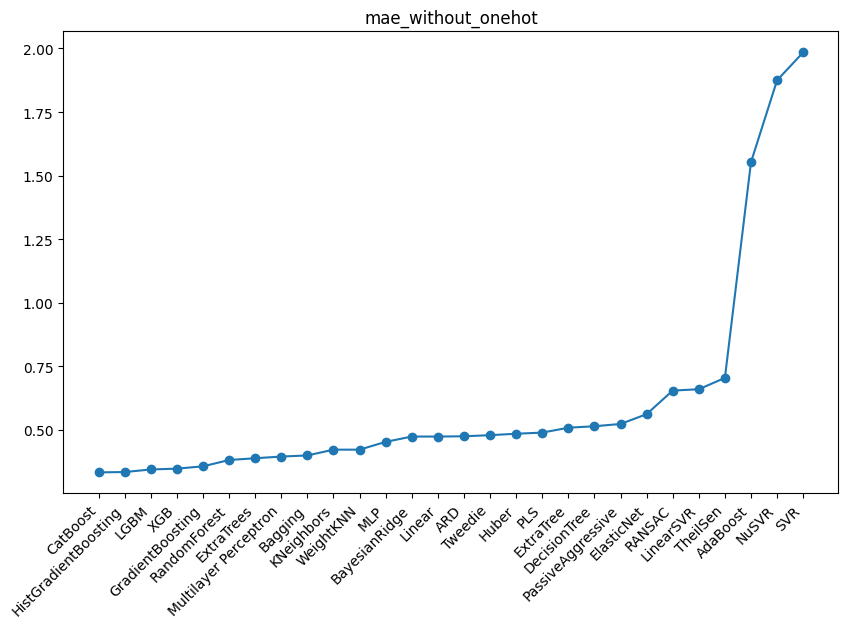

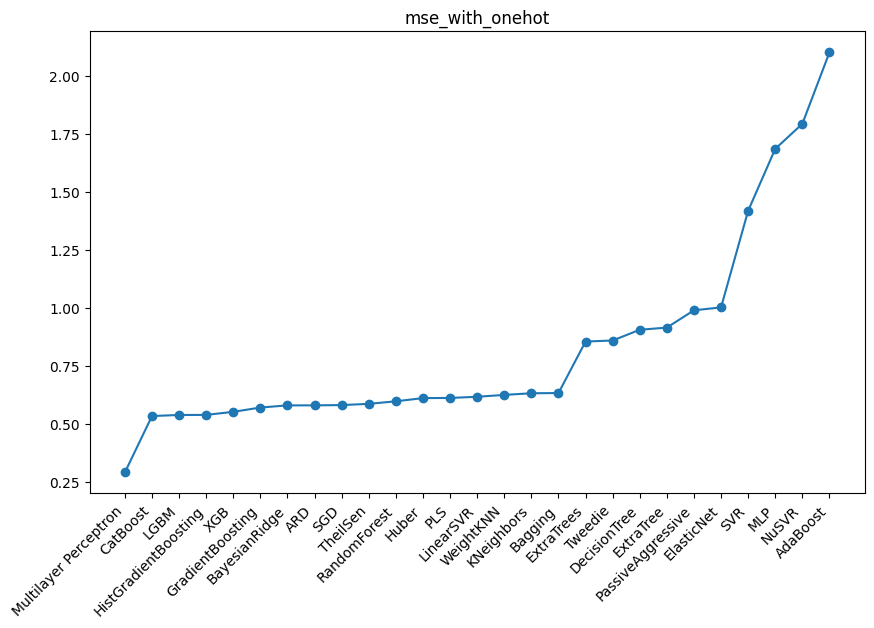

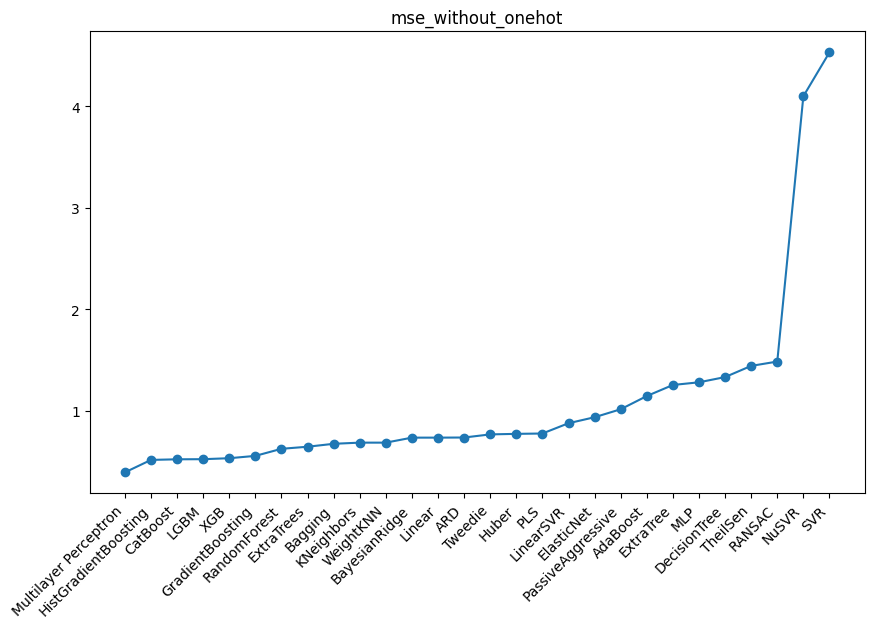

In [5]:
draw(clearname(clear(mae_with_onehot)), nameof(mae_with_onehot))
draw(clearname(clear(mae_without_onehot)), nameof(mae_without_onehot))
draw(clearname(clear(mse_with_onehot)), nameof(mse_with_onehot))
draw(clearname(clear(mse_without_onehot)), nameof(mse_without_onehot))

In [6]:
def draw2(df1, df2, title):
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, fontsize=10, ha='right')
    # concat df2 to df1 by name
    df1 = pd.merge(df1, df2, on='name')
    # print(df1.columns)
    plt.title(title)
    df1.sort_values(by=['test_score_x'], inplace=True)
    plt.plot(df1['name'], df1['test_score_x'], 'o-', label='with onehot')
    plt.plot(df1['name'], df1['test_score_y'], 'o-', label='without onehot')
    plt.legend(loc='upper right')
    plt.show()
def draw4(df1, df2, title):
    # just change the order from df1 to df2
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, fontsize=10, ha='right')
    # concat df2 to df1 by name
    df1 = pd.merge(df1, df2, on='name')
    plt.title(title)
    df1.sort_values(by=['test_score_y'], inplace=True)
    plt.plot(df1['name'], df1['test_score_x'], 'o-', label='with onehot')
    plt.plot(df1['name'], df1['test_score_y'], 'o-', label='without onehot')
    plt.legend(loc='upper right')
    plt.show()

In [7]:
def draw3(df1, title):
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.title(title)
    plt.plot(df1['name'], df1['test_score'], 'o-', label='test_score')
    plt.plot(df1['name'], df1['train_score'], 'o-', label='train_score')
    plt.legend(loc='upper right')
    plt.show()

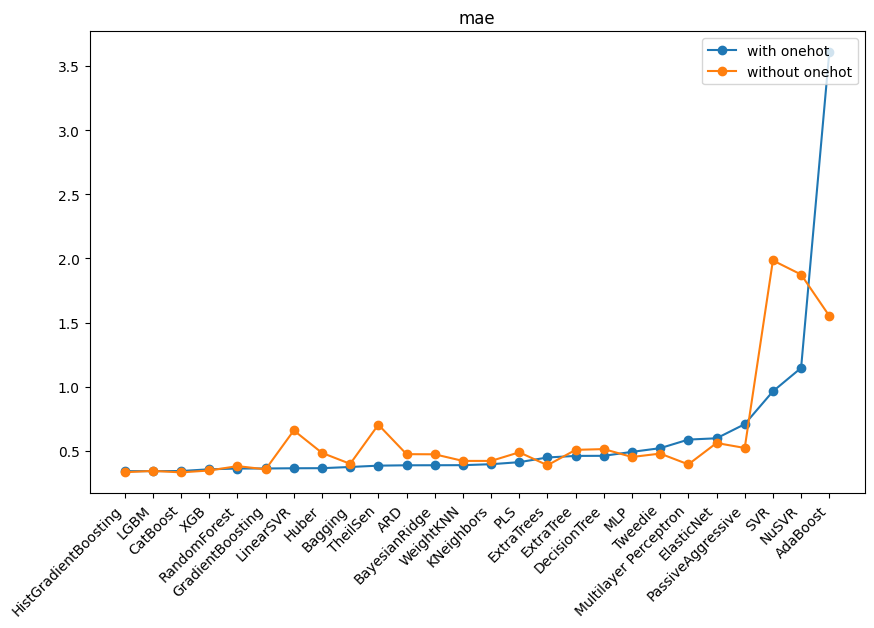

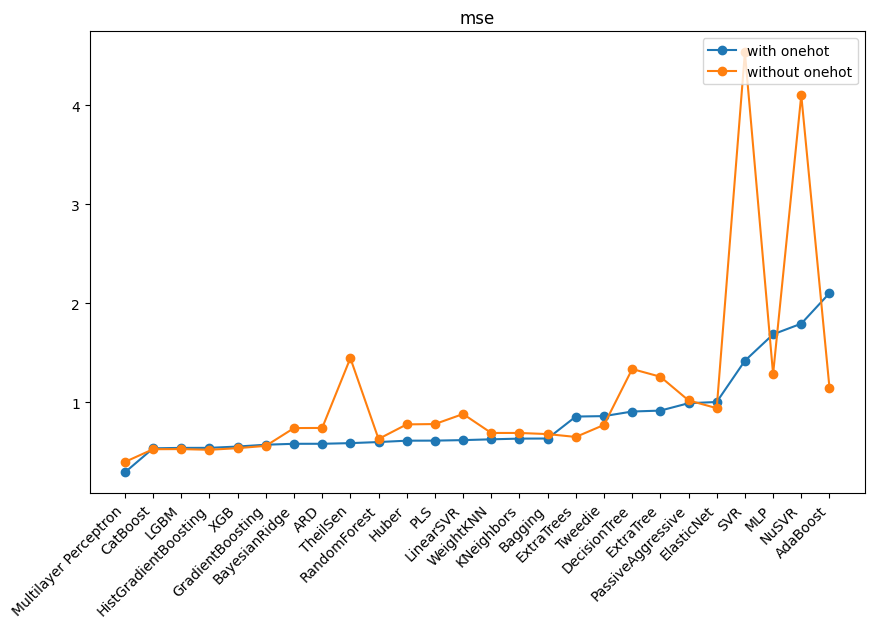

In [8]:
draw2(clearname(clear(mae_with_onehot)), clearname(clear(mae_without_onehot)), 'mae')
draw2(clearname(clear(mse_with_onehot)), clearname(clear(mse_without_onehot)), 'mse')

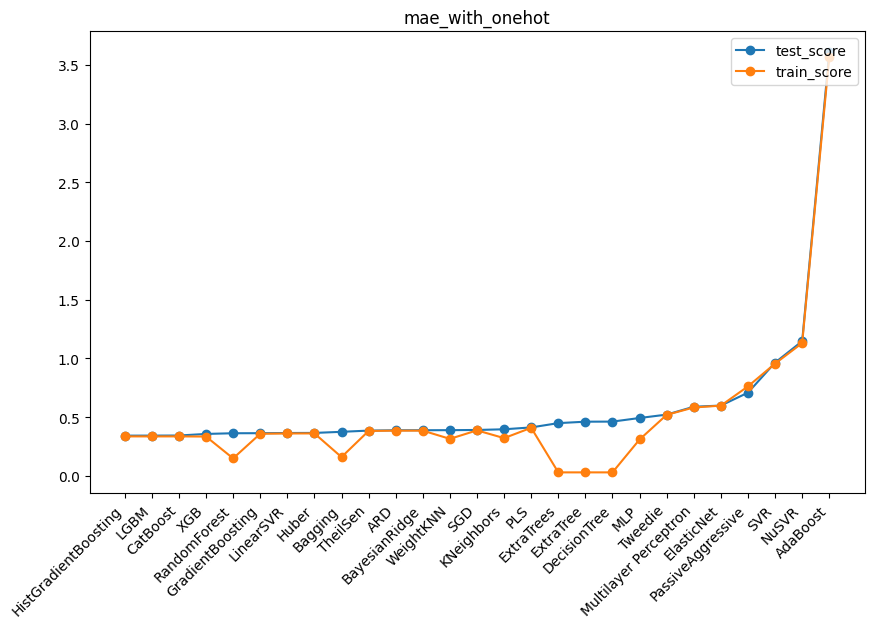

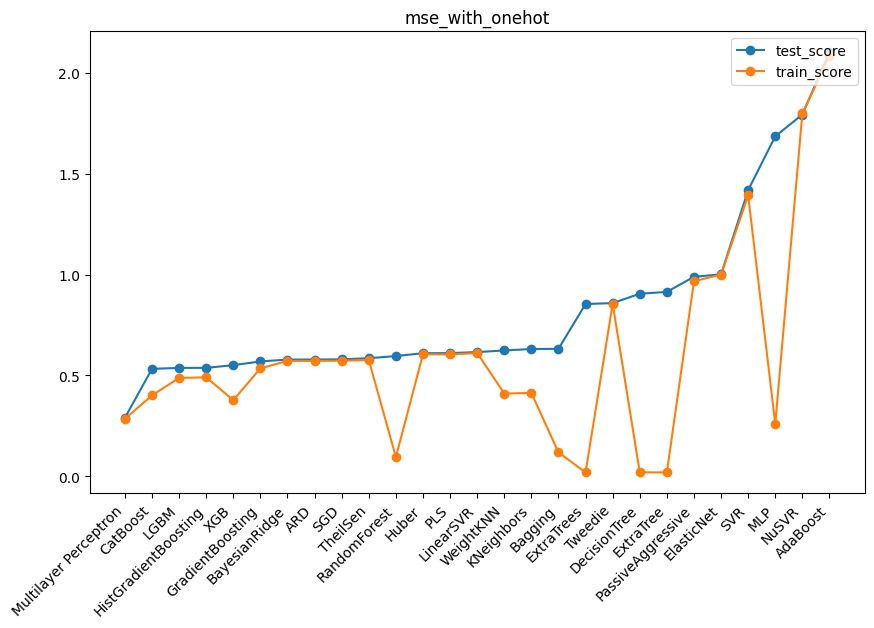

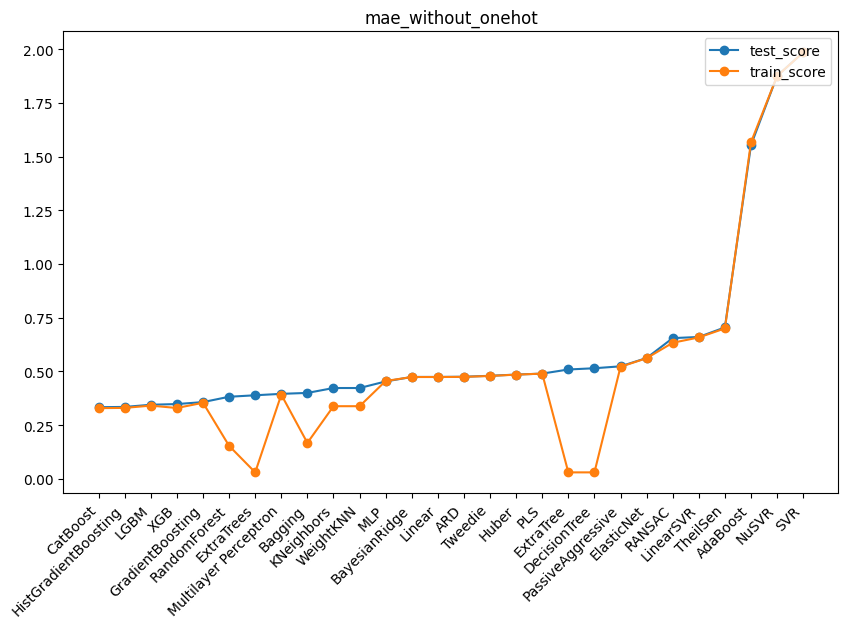

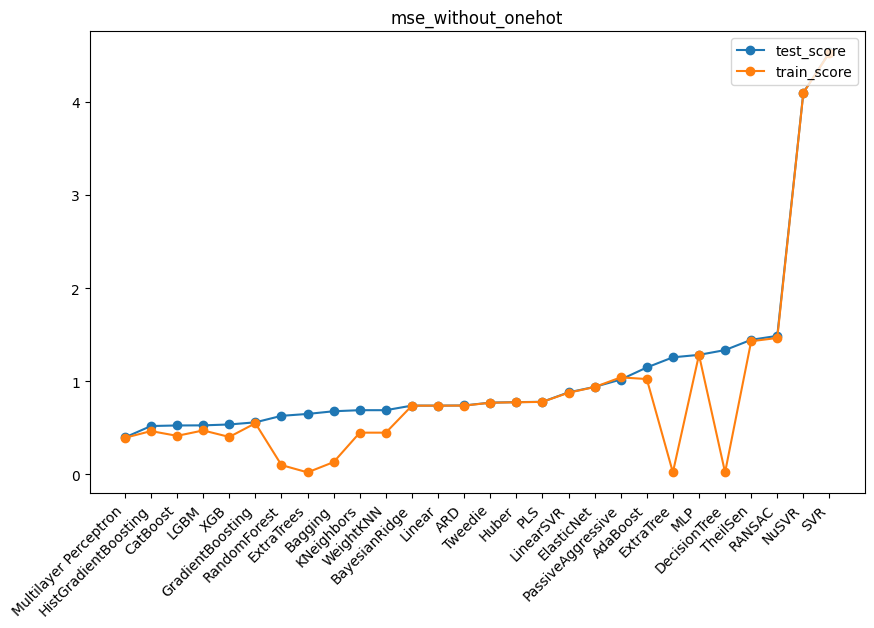

In [9]:
draw3(clearname(clear(mae_with_onehot)), 'mae_with_onehot')
draw3(clearname(clear(mse_with_onehot)), 'mse_with_onehot')
draw3(clearname(clear(mae_without_onehot)), 'mae_without_onehot')
draw3(clearname(clear(mse_without_onehot)), 'mse_without_onehot')

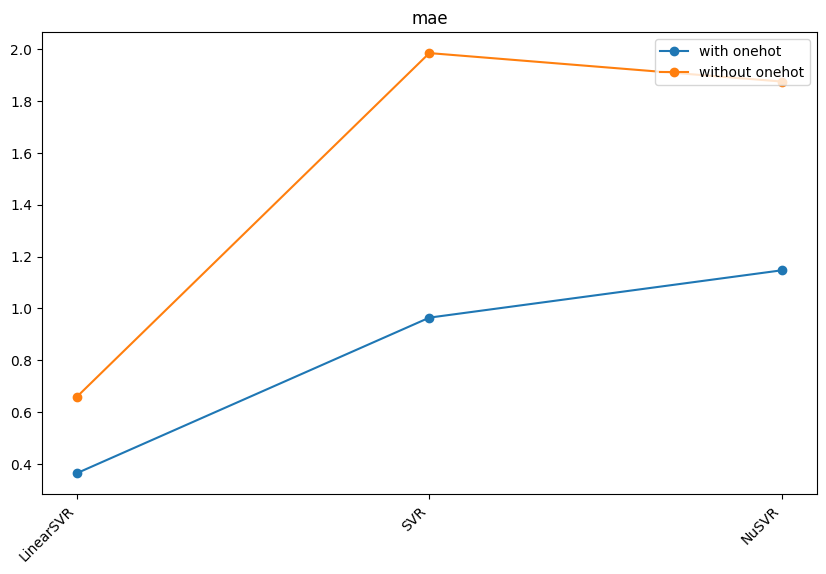

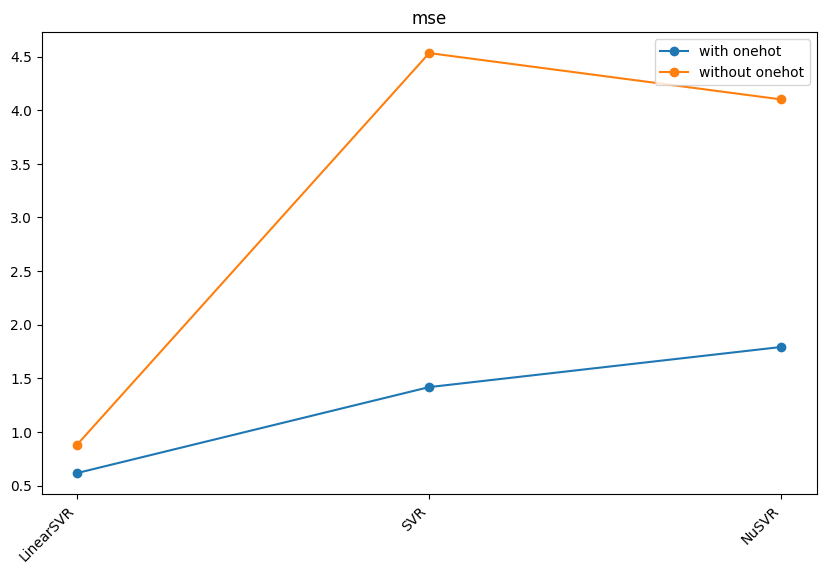

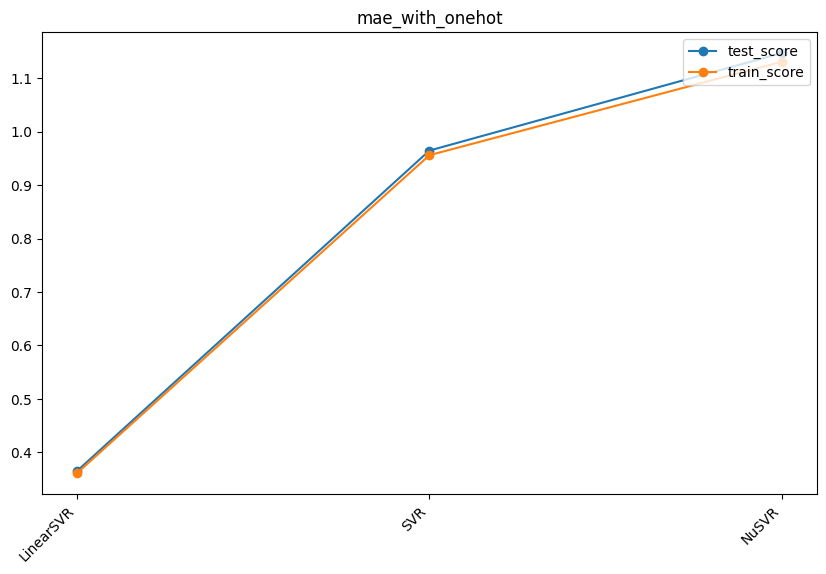

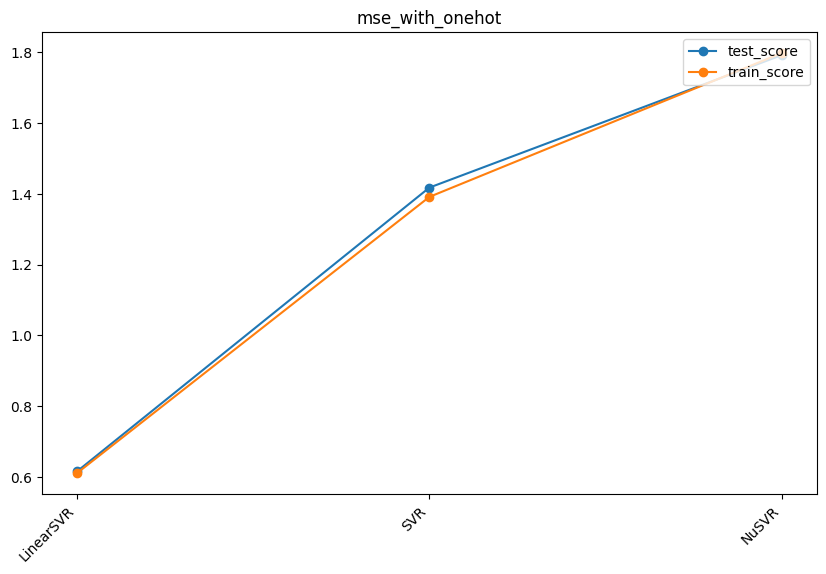

In [10]:
dic = ["SVR", "NuSVR", "LinearSVR"]
draw2(clearname(clear(mae_with_onehot[mae_with_onehot['name'].isin(dic)])), clearname(clear(mae_without_onehot[mae_without_onehot['name'].isin(dic)])), 'mae')
draw2(clearname(clear(mse_with_onehot[mse_with_onehot['name'].isin(dic)])), clearname(clear(mse_without_onehot[mse_without_onehot['name'].isin(dic)])), 'mse')
draw3(clearname(clear(mae_with_onehot[mae_with_onehot['name'].isin(dic)])), 'mae_with_onehot')
draw3(clearname(clear(mse_with_onehot[mse_with_onehot['name'].isin(dic)])), 'mse_with_onehot')

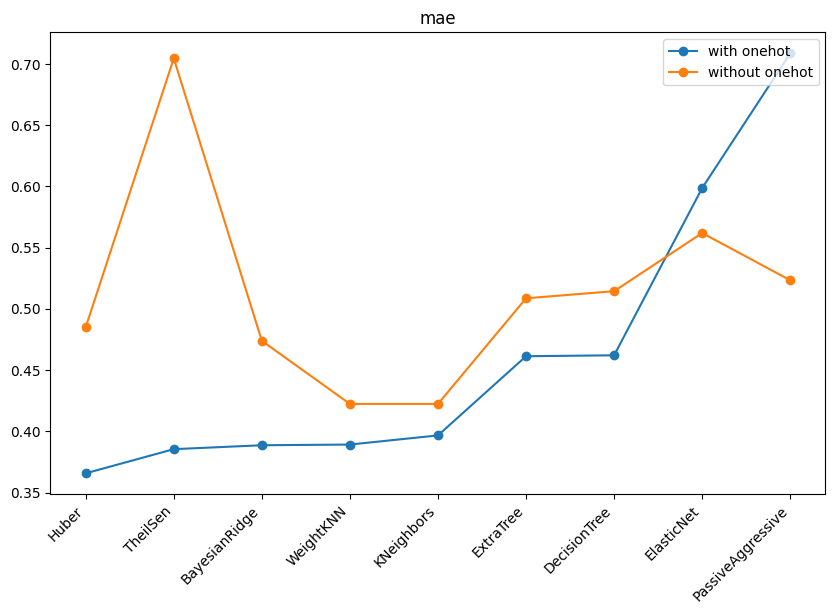

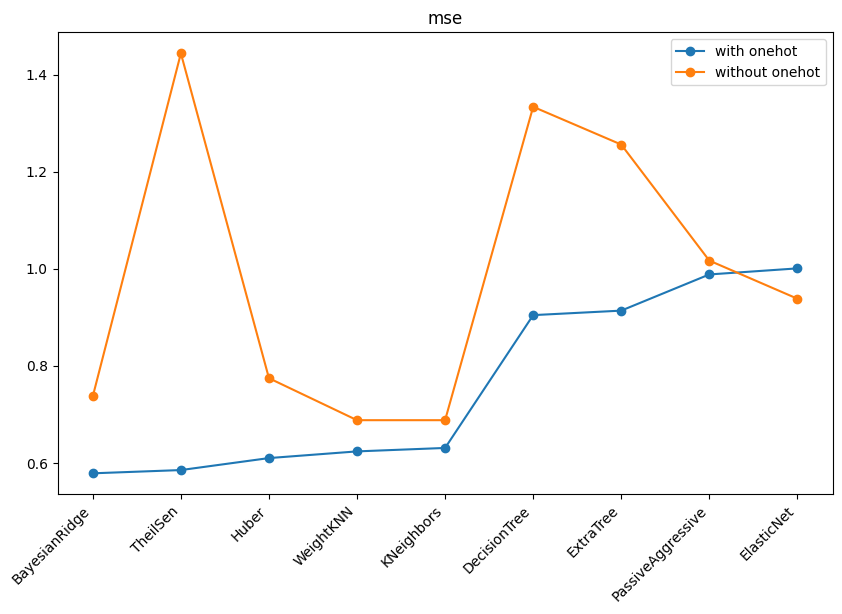

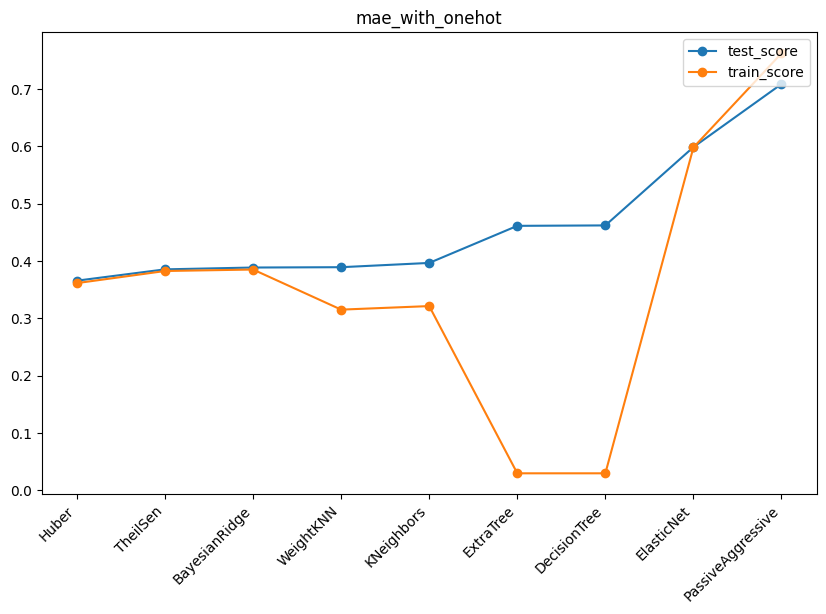

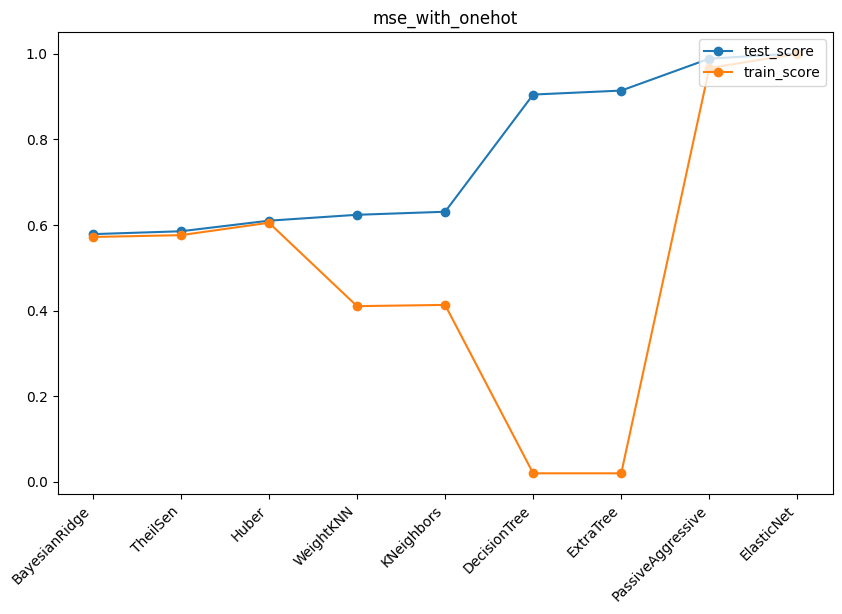

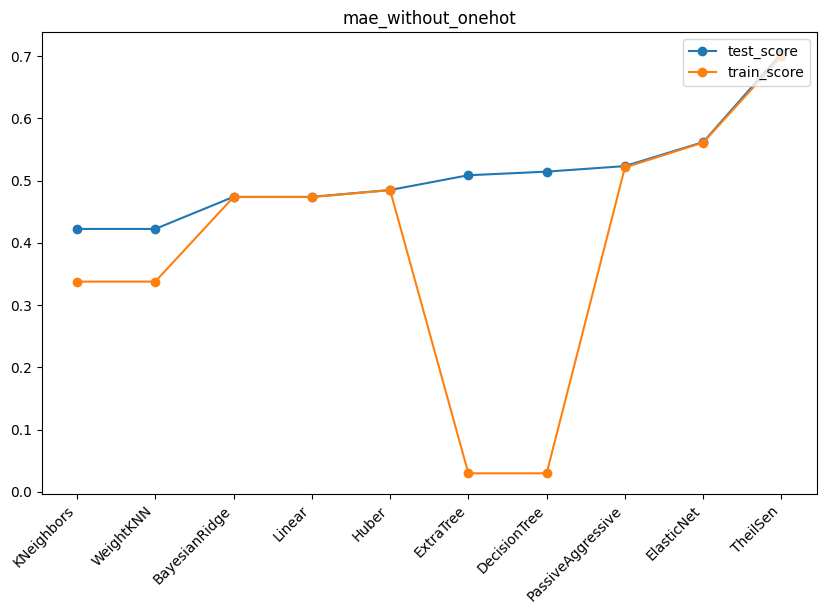

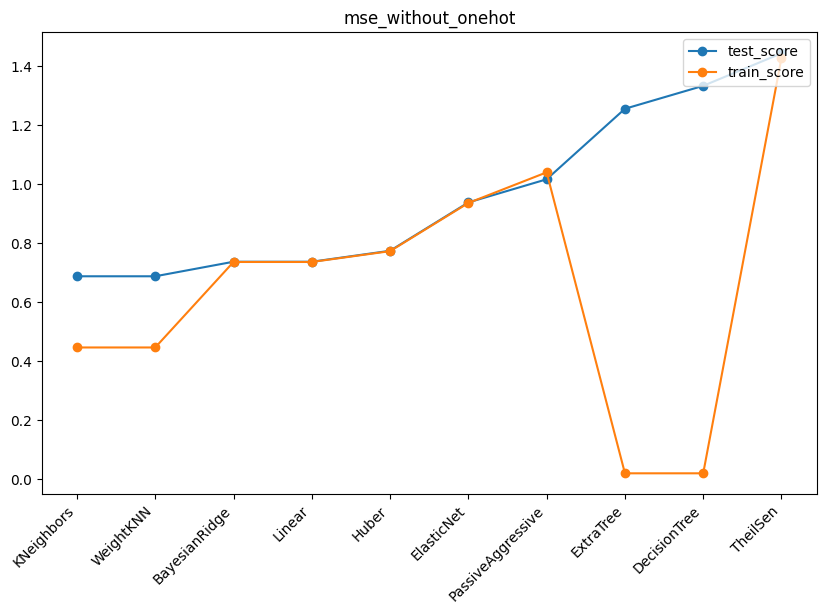

In [11]:
dic = ["LinearRegression", "ExtraTreeRegressor", "DecisionTreeRegressor", "KNeighborsRegressor", "WeightKNN", "HuberRegressor", "PassiveAggressiveRegressor", "TheilSenRegressor", "BayesianRidge", "ElasticNet"]
draw2(clearname(clear(mae_with_onehot[mae_with_onehot['name'].isin(dic)])), clearname(clear(mae_without_onehot[mae_without_onehot['name'].isin(dic)])), 'mae')
draw2(clearname(clear(mse_with_onehot[mse_with_onehot['name'].isin(dic)])), clearname(clear(mse_without_onehot[mse_without_onehot['name'].isin(dic)])), 'mse')
draw3(clearname(clear(mae_with_onehot[mae_with_onehot['name'].isin(dic)])), 'mae_with_onehot')
draw3(clearname(clear(mse_with_onehot[mse_with_onehot['name'].isin(dic)])), 'mse_with_onehot')
draw3(clearname(clear(mae_without_onehot[mae_without_onehot['name'].isin(dic)])), 'mae_without_onehot')
draw3(clearname(clear(mse_without_onehot[mse_without_onehot['name'].isin(dic)])), 'mse_without_onehot')

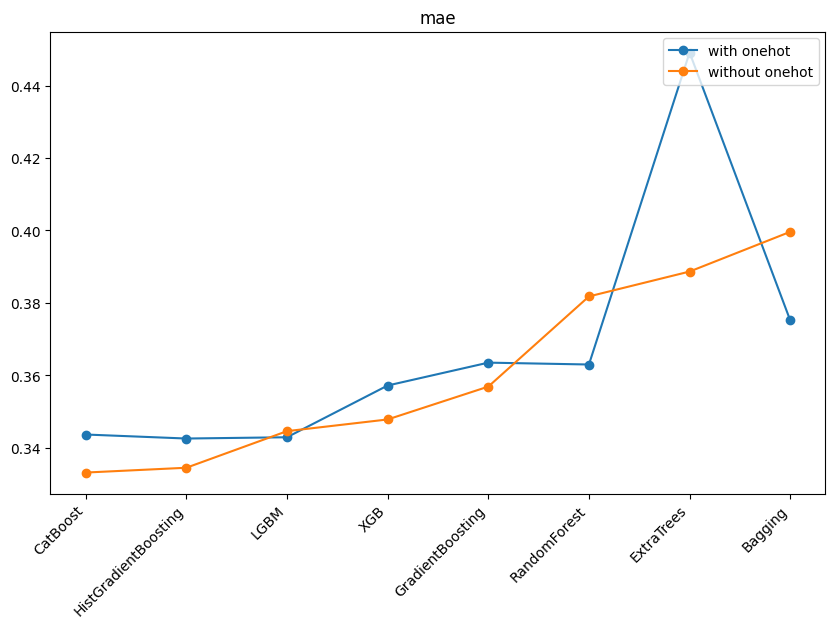

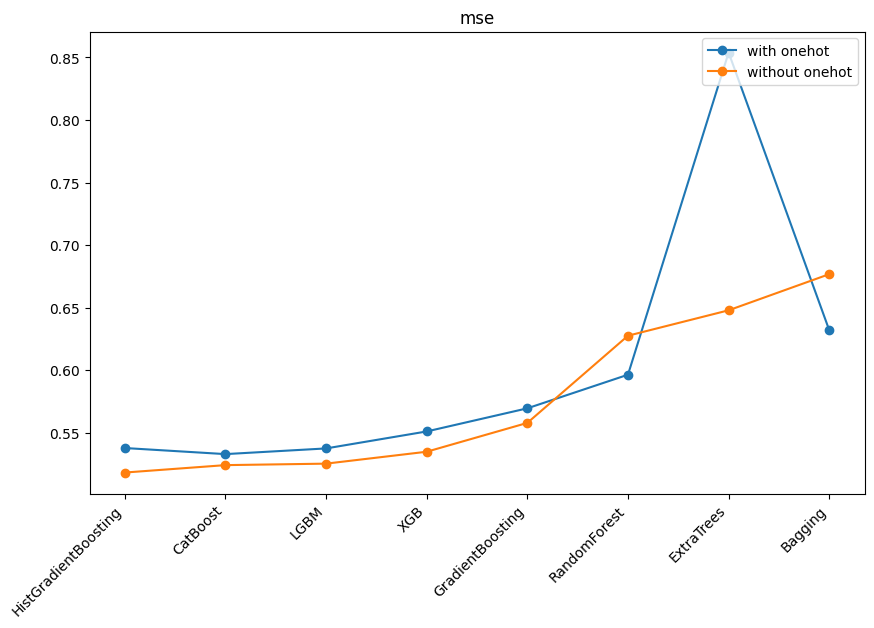

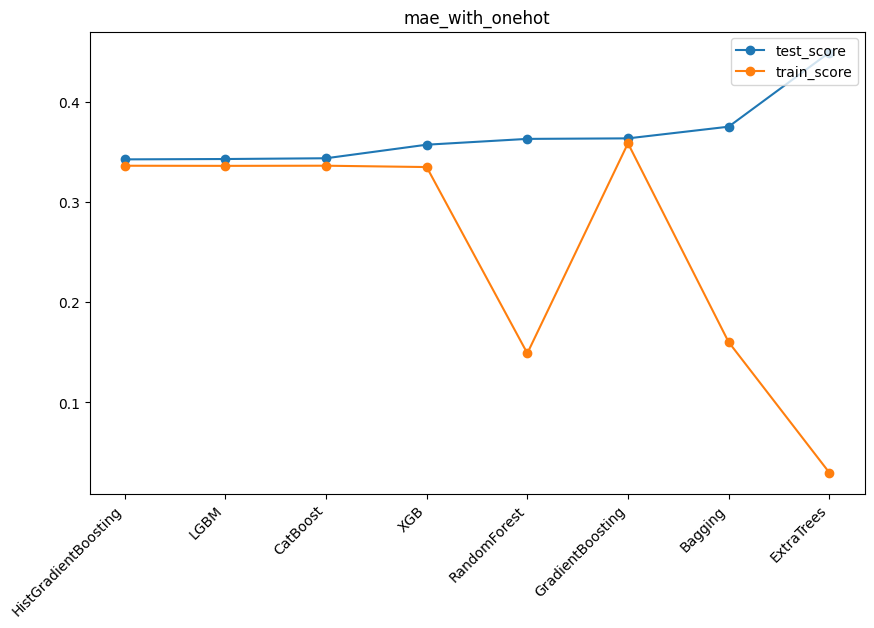

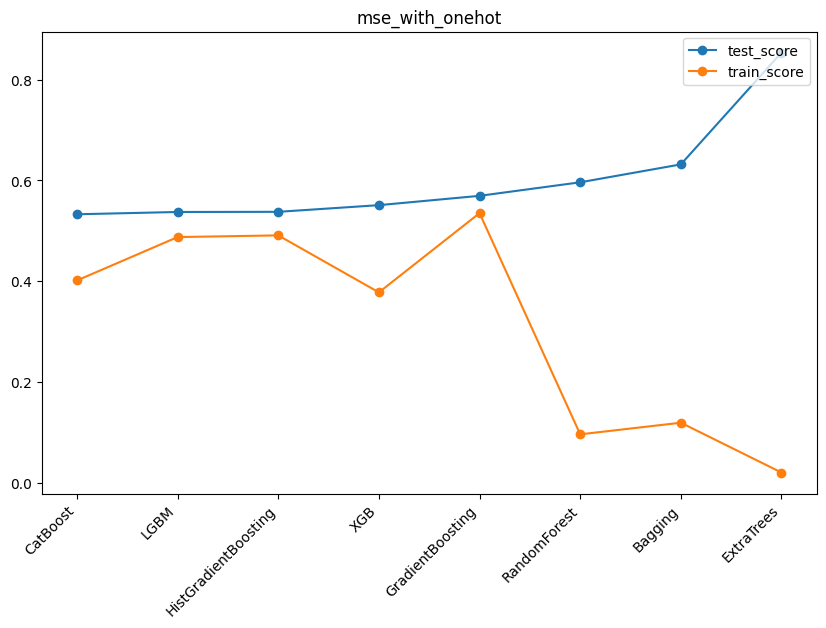

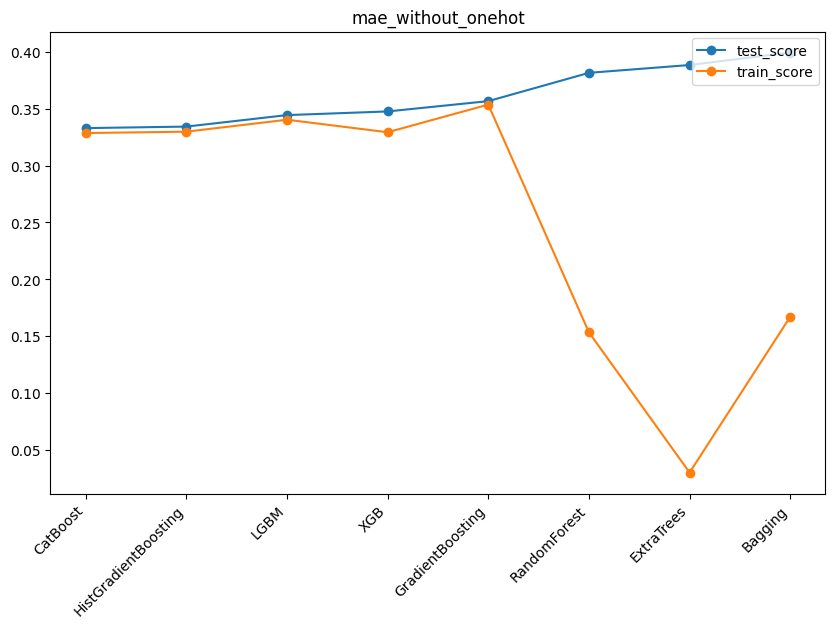

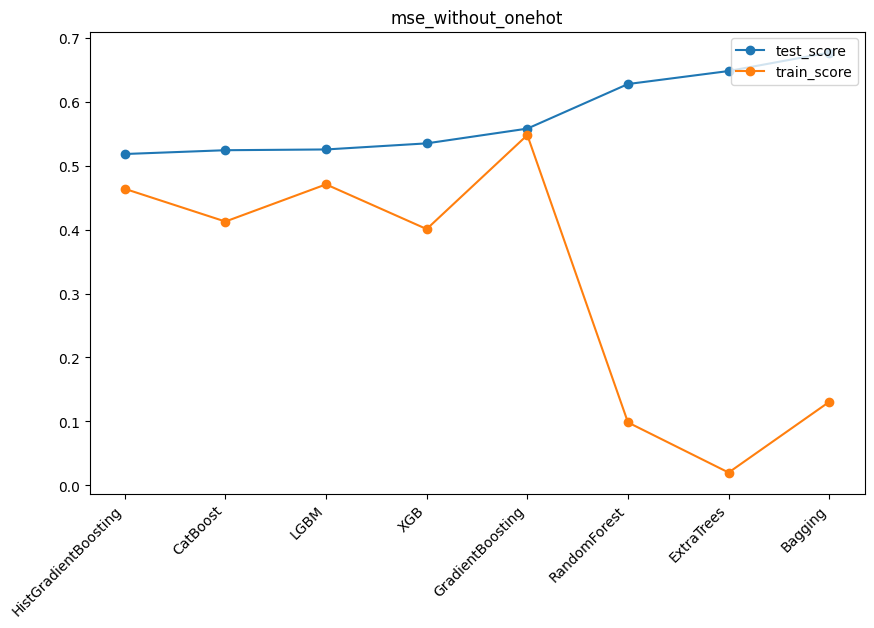

In [12]:
dic = ["RandomForestRegressor", "GradientBoostingRegressor", "BaggingRegressor", "ExtraTreesRegressor", "HistGradientBoostingRegressor", "XGBRegressor", "LGBMRegressor", "CatBoostRegressor"]
draw4(clearname(clear(mae_with_onehot[mae_with_onehot['name'].isin(dic)])), clearname(clear(mae_without_onehot[mae_without_onehot['name'].isin(dic)])), 'mae')
draw4(clearname(clear(mse_with_onehot[mse_with_onehot['name'].isin(dic)])), clearname(clear(mse_without_onehot[mse_without_onehot['name'].isin(dic)])), 'mse')
draw3(clearname(clear(mae_with_onehot[mae_with_onehot['name'].isin(dic)])), 'mae_with_onehot')
draw3(clearname(clear(mse_with_onehot[mse_with_onehot['name'].isin(dic)])), 'mse_with_onehot')
draw3(clearname(clear(mae_without_onehot[mae_without_onehot['name'].isin(dic)])), 'mae_without_onehot')
draw3(clearname(clear(mse_without_onehot[mse_without_onehot['name'].isin(dic)])), 'mse_without_onehot')


In [13]:
otherdic = ["MLPRegressor", "PLSRegression", ]